# Midiendo rendimiento y riesgo con datos históricos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

> Ya sabemos que podemos caracterizar la distribución de rendimientos de un activo mediante una medida de tendencia central (media: rendimiento esperado) y una medida de dispersión (desviación estándar: volatilidad). 

> En la clase pasada vimos como obtener reportes históricos de precios de activos. ¿Cómo usamos estos históricos para medir el rendimiento esperado y la volatilidad de los rendimientos?

*Objetivos:*
- Calcular los rendimientos a partir de históricos de precios.
- Estimar rendimiento esperado y riesgo a partir de históricos de rendimientos.
- Anualizar rendimiento y volatilidad cuando los datos están en una base de tiempo menor.
- Verificar la relación entre rendimiento y riesgo a través de datos reales.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___

## 1. Cálculo de los rendimientos

Muy bien, ya entonces sabemos descargar históricos de precios...

**Ejemplo:** trabajaremos esta clase con activos que se encuentran en el top-50 del índice S&P500. Descargar precios ajustados en el cierre de Apple, Walmart, IBM y Nike desde el primero de enero del 2011 hasta el 31 de diciembre del 2015

In [3]:
# Importar paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

In [4]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [8]:
# Información
names = ['AAPL', 'IBM', 'WMT', 'NKE']
start = '2011-01-01'

In [9]:
# Precios diarios
closes = get_adj_closes(tickers=names,start_date=start)
closes.head()


Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2011-01-03,41.088589,111.370743,17.019068,43.743290
2011-01-04,41.303032,111.491577,16.599974,43.911667
2011-01-05,41.640896,111.046013,16.708702,43.623039
2011-01-06,41.607231,112.261848,16.558455,43.262245
2011-01-07,41.905193,111.710556,16.512985,43.358452


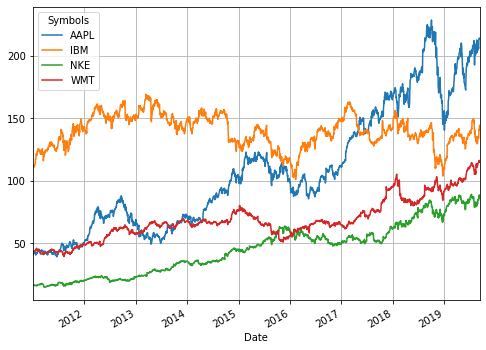

In [10]:
# Gráfico de histórico de precios diarios
closes.plot(figsize=(8,6), grid=True)

### 1.1. Rendimientos porcentuales

Muy bien, pero para el análisis no trabajamos con los precios sino con los rendimientos... **¿porqué?**

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

*¡Cuidado!* los rendimientos son de acuerdo a la base de tiempo en que se reportan los precios. Por ejemplo: 
- si los precios se reportan en una base diaria, los rendimientos también son diarios;
- si los precios se reportan en una base mensual, los rendimientos también son mensuales.

In [11]:
# Método shift() de un DataFrame...
help(closes.shift)

Help on method shift in module pandas.core.frame:

shift(periods=1, freq=None, axis=0, fill_value=None) method of pandas.core.frame.DataFrame instance
    Shift index by desired number of periods with an optional time `freq`.
    
    When `freq` is not passed, shift the index without realigning the data.
    If `freq` is passed (in this case, the index must be date or datetime,
    or it will raise a `NotImplementedError`), the index will be
    increased using the periods and the `freq`.
    
    Parameters
    ----------
    periods : int
        Number of periods to shift. Can be positive or negative.
    freq : DateOffset, tseries.offsets, timedelta, or str, optional
        Offset to use from the tseries module or time rule (e.g. 'EOM').
        If `freq` is specified then the index values are shifted but the
        data is not realigned. That is, use `freq` if you would like to
        extend the index when shifting and preserve the original data.
    axis : {0 or 'index', 1 or

In [12]:
closes


Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2011-01-03,41.088589,111.370743,17.019068,43.743290
2011-01-04,41.303032,111.491577,16.599974,43.911667
2011-01-05,41.640896,111.046013,16.708702,43.623039
2011-01-06,41.607231,112.261848,16.558455,43.262245
2011-01-07,41.905193,111.710556,16.512985,43.358452
2011-01-10,42.694374,111.491577,16.639511,43.077843
2011-01-11,42.593380,111.219704,16.609856,43.526817
2011-01-12,42.939980,112.594101,16.552525,43.975796
2011-01-13,43.097080,112.382645,16.321226,43.927696


In [14]:
ret = ((closes - closes.shift()) / closes.shift()).dropna()
ret.head()

Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2011-01-04,0.005219,0.001085,-0.024625,0.003849
2011-01-05,0.008180,-0.003996,0.006550,-0.006573
2011-01-06,-0.000808,0.010949,-0.008992,-0.008271
2011-01-07,0.007161,-0.004911,-0.002746,0.002224
2011-01-10,0.018833,-0.001960,0.007662,-0.006472


In [15]:
# Calcular los rendimientos
ret = ((closes - closes.shift()) / closes.shift()).dropna()
ret.head()

Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2011-01-04,0.005219,0.001085,-0.024625,0.003849
2011-01-05,0.008180,-0.003996,0.006550,-0.006573
2011-01-06,-0.000808,0.010949,-0.008992,-0.008271
2011-01-07,0.007161,-0.004911,-0.002746,0.002224
2011-01-10,0.018833,-0.001960,0.007662,-0.006472


In [16]:
# Otra forma (más fácil)
ret = closes.pct_change().dropna()
ret.head()

Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2011-01-04,0.005219,0.001085,-0.024625,0.003849
2011-01-05,0.008180,-0.003996,0.006550,-0.006573
2011-01-06,-0.000808,0.010949,-0.008992,-0.008271
2011-01-07,0.007161,-0.004911,-0.002746,0.002224
2011-01-10,0.018833,-0.001960,0.007662,-0.006472


**¿Qué se observa respecto a los precios?**

Respuestas:
- Los rendimientos parecen conservar tendecias estadísticas constantes (por ejemplo, oscilan al rededor de números cercanos a cero). 

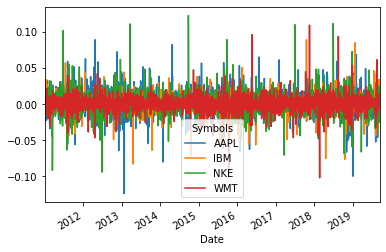

In [17]:
# Graficar...
ret.plot()

### 1.2. Rendimientos logarítmicos (log-rendimientos)

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

<font color=blue>Ver en el tablero</font> que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

In [20]:
# Calcular rendimientos continuamente compuestos
log_ret = np.log(closes/closes.shift()).dropna()
log_ret

Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2011-01-04,0.005205,0.001084,-0.024933,0.003842
2011-01-05,0.008147,-0.004004,0.006529,-0.006595
2011-01-06,-0.000809,0.010889,-0.009033,-0.008305
2011-01-07,0.007136,-0.004923,-0.002750,0.002221
2011-01-10,0.018657,-0.001962,0.007633,-0.006493
2011-01-11,-0.002368,-0.002441,-0.001784,0.010368
2011-01-12,0.008104,0.012282,-0.003458,0.010262
2011-01-13,0.003652,-0.001880,-0.014072,-0.001094
2011-01-14,0.008067,0.007898,0.018125,0.000365


In [21]:
# Recordar rendimientos porcentuales. Ver que son similares
ret.head()

Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2011-01-04,0.005219,0.001085,-0.024625,0.003849
2011-01-05,0.008180,-0.003996,0.006550,-0.006573
2011-01-06,-0.000808,0.010949,-0.008992,-0.008271
2011-01-07,0.007161,-0.004911,-0.002746,0.002224
2011-01-10,0.018833,-0.001960,0.007662,-0.006472


In [22]:
# Veamos el valor absoluto de la diferencia
np.abs(ret - log_ret)

Symbols,AAPL,IBM,NKE,WMT
Date,,,,
2011-01-04,1.357202e-05,5.881588e-07,3.082659e-04,7.389237e-06
2011-01-05,3.327587e-05,8.006922e-06,2.135748e-05,2.169673e-05
2011-01-06,3.269743e-07,5.950563e-05,4.067362e-05,3.439219e-05
2011-01-07,2.552040e-05,1.209747e-05,3.777136e-06,2.468988e-06
2011-01-10,1.751366e-04,1.923774e-06,2.920560e-05,2.103318e-05
2011-01-11,2.802247e-06,2.978011e-06,1.590064e-06,5.393878e-05
2011-01-12,3.293016e-05,7.573062e-05,5.970620e-06,5.283642e-05
2011-01-13,6.676438e-06,1.765729e-06,9.854997e-05,5.986057e-07
2011-01-14,3.262687e-05,3.127100e-05,1.652523e-04,6.656099e-08


Por lo anterior, muchas veces se usan para el análisis los rendimientos continuamente compuestos.
___

## 2. Caracterización de la distribución de los rendimientos

Entonces:
- partimos de que tenemos los rendimientos porcentuales diarios de Apple, Walmart, IBM y Nike desde inicios del 2011 a finales del 2015;
- ¿cómo resumirían estos datos?

In [23]:
# Rendimiento medio diario (media aritmética)
ret.mean()

Symbols
AAPL    0.000888
IBM     0.000198
NKE     0.000858
WMT     0.000509
dtype: float64

In [24]:
# Volatilidad diaria (desviación estándar)
ret.std()

Symbols
AAPL    0.016271
IBM     0.012525
NKE     0.015167
WMT     0.011202
dtype: float64

In [27]:
# Podemos resumir en un DataFrame
ret_summary = pd.DataFrame(data={'Mean':ret.mean(),'Volatility':ret.std()},index=ret.columns)
ret_summary

,Mean,Volatility
Symbols,,
AAPL,0.000888,0.016271
IBM,0.000198,0.012525
NKE,0.000858,0.015167
WMT,0.000509,0.011202


Normalmente se reportan rendimientos esperados y volatilidades en una base anual. Para anualizar:

$$E[r_a]=12E[r_m]=252E[r_d]=52E[r_w],\text{ y}$$

$$\sigma_{r_a}=\sqrt{12}\sigma_{r_m}=\sqrt{252}\sigma_{r_d}=\sqrt{52}\sigma_{r_w}$$

In [31]:
# Resumen en base anual
annual_ret_summary = pd.DataFrame(data={'Mean':252*ret.mean(),'Volatility':np.sqrt(252)*ret.std()},index=ret.columns)
annual_ret_summary

,Mean,Volatility
Symbols,,
AAPL,0.223741,0.258287
IBM,0.049833,0.198832
NKE,0.216302,0.240776
WMT,0.128279,0.177831


Text(0.24077586801962736, 0.21630225787360463, 'NKE')

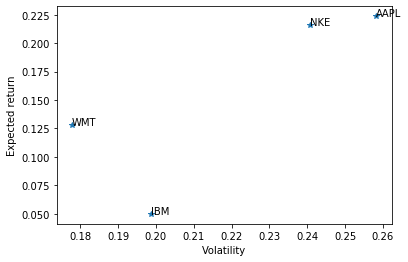

In [56]:
# Gráfico rendimiento esperado vs. volatilidad
# Puntos a graficar
x_points = annual_ret_summary['Volatility']
y_points = annual_ret_summary['Mean']
# Ventana para graficar
plt.figure()
# Graficar puntos
plt.plot(x_points, y_points, '*')
# Etiquetas de los ejes
plt.xlabel('Volatility')
plt.ylabel('Expected return')
# Etiqueta de cada instrumento
plt.text(annual_ret_summary.loc['AAPL','Volatility'],annual_ret_summary.loc['AAPL','Mean'],'AAPL')
plt.text(annual_ret_summary.loc['IBM','Volatility'],annual_ret_summary.loc['IBM','Mean'],'IBM')
plt.text(annual_ret_summary.loc['WMT','Volatility'],annual_ret_summary.loc['WMT','Mean'],'WMT')
plt.text(annual_ret_summary.loc['NKE','Volatility'],annual_ret_summary.loc['NKE','Mean'],'NKE')
# Grafico recta ajustada


### 2.1 Ajuste de curvas con mínimos cuadrados
Consideramos que tenemos un conjunto de n pares ordenados de datos $(\sigma_{r_i},E[r_i])$, para $i=1,2,3,\dots,n$... **en este caso corresponden a volatilidad y rendimiento esperado**

#### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(\sigma) = \beta_0+\beta_1 \sigma = \left[1 \quad \sigma\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad \sigma\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $\sigma_{r_i}$ ($\hat{f}(\sigma_{r_i})$) aproxime los valores correspondientes $E[r_i]$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(E[r_i]-\hat{f}(\sigma_{r_i}))^2$$

In [43]:
# Importar el módulo optimize de la librería scipy
import scipy.optimize as opt


In [44]:
# Funcion minimize
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [64]:
# Funcion objetivo y condicion inicial
def obj_fun(beta, Er, sigma):
    return((Er-(beta[0]+beta[1]*sigma))**2).sum()
beta_0 = [0, 1]

In [65]:
# Resolver problema de optimizacion
solution = opt.minimize(obj_fun, beta_0, args=(y_points, x_points))
solution

      fun: 0.0074736111405928635
 hess_inv: array([[  5.94288066, -26.5739603 ],
       [-26.5739603 , 121.38017396]])
      jac: array([-1.16415322e-10,  1.39698386e-09])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([-0.23112841,  1.76158637])

In [66]:
beta = solution.x
beta

array([-0.23112841,  1.76158637])

In [67]:
# Ordenar datos con np.sort
y_points = y_points[np.argsort(x_points)]
x_points = np.sort(x_points)


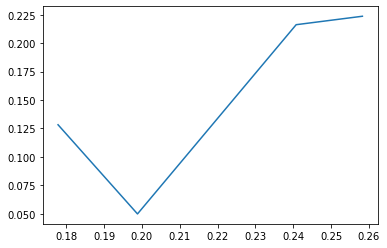

In [68]:
plt.plot(x_points, y_points)

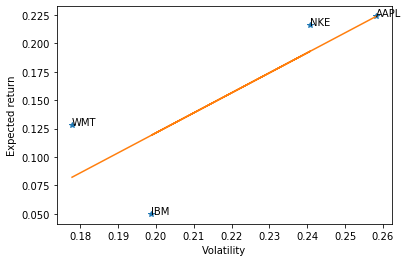

In [69]:
# Gráfico rendimiento esperado vs. volatilidad
# Puntos a graficar
x_points = annual_ret_summary['Volatility']
y_points = annual_ret_summary['Mean']
# Ventana para graficar
plt.figure()
# Graficar puntos
plt.plot(x_points, y_points, '*')
# Etiquetas de los ejes
plt.xlabel('Volatility')
plt.ylabel('Expected return')
# Etiqueta de cada instrumento
plt.text(annual_ret_summary.loc['AAPL','Volatility'],annual_ret_summary.loc['AAPL','Mean'],'AAPL')
plt.text(annual_ret_summary.loc['IBM','Volatility'],annual_ret_summary.loc['IBM','Mean'],'IBM')
plt.text(annual_ret_summary.loc['WMT','Volatility'],annual_ret_summary.loc['WMT','Mean'],'WMT')
plt.text(annual_ret_summary.loc['NKE','Volatility'],annual_ret_summary.loc['NKE','Mean'],'NKE')
# Grafico recta ajustada
plt.plot(x_points, beta[0] + beta[1] * x_points)

**¿Qué se puede concluir acerca de la relación entre riesgo (medido con la volatilidad) y el rendimiento esperado (medido con la media)?**

Respuestas:
- Para un rendimiento esperado más alto, se necesita asumir más riesgo.
- La relación entre rendimiento esperado y riesgo es positiva (de acuerdo a los datos).

## 3. Comentarios finales acerca del uso de datos históricos.

### ¡Cuidado!
- Es cierto que los patrones que vemos sobre periodos largos de tiempo en diferentes tipos de intrumentos son muy robustos en términos de la relación rendimiento/riesgo (positiva).
- Por tanto, esperamos rendimientos más altos en el futuro cuando asumimos cierto riesgo.
- ¿Cómo encontramos ese 'rendimiento esperado' en el futuro'? Datos históricos (humanos: tendencia a generalizar)

- Entonces, la idea es que si los rendimientos esperados son un p.e. estacionario, el promedio de muchos rendimientos pasados es una buena estimación del rendimiento esperado futuro (Teorema del límite central).
- ¿Deberíamos pensarlo dos veces?

## SI

Problemas:
- La muestra de datos en el periodo específico de tiempo puede estar sesgada.
- Ventanas de tiempo más grandes reducen especificidad de la muestra y estimados más precisos.
 - Aún así, datos muy viejos pueden ser no representativos.
- Nuevos fondos o estrategias de inversión están a menudo sesgados positivamente:
 - reporte de resultados en tiempos voluntarios;
 - las que mueren (no funcionan), no se reportan;

# Anuncios parroquiales:
## 1. Fin Módulo 1. Revisar que se hayan cumplido los objetivos del módulo (Clase0)
## 2. Tarea: revisar archivo "Tarea3_MidiendoRendimientoRiesgo" en clase.
## 3. Recordar quiz la siguiente clase.
## 4. Tarea 3 para el lunes 16 de Septiembre.
## 5. No hay clase el viernes.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>